In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
hort_df = pd.read_csv("E:\My Python codes\Horticultural_Exports_2005-2014.csv", index_col = ["OBJECTID"]) 
hort_df

,_Commodity,Type,Kgs,Kshs,Date
OBJECTID,,,,,
0,Flowers,ALSTROMERIA,949410.06,192174616.5,01/01/2005 12:00:00 AM
1,Flowers,ARABICUM,164136.06,30285412.0,01/01/2005 12:00:00 AM
2,Flowers,"CARNATIONS, STD",2599236.25,707280768.0,01/01/2005 12:00:00 AM
3,Flowers,"CARNATIONS, SPRAY",936688.00,164790960.0,01/01/2005 12:00:00 AM
4,Flowers,CUTTINGS,469077.50,659962176.0,01/01/2005 12:00:00 AM
...,...,...,...,...,...
165,Vegetables,BEANS RUNNER,832454.53,290131830.0,01/01/2014 12:00:00 AM
166,Vegetables,PEAS SNAP,1109364.46,332928224.0,01/01/2014 12:00:00 AM
167,Vegetables,PEAS SNOW,3045919.16,980570928.0,01/01/2014 12:00:00 AM


In [3]:
hort_df.rename(columns = {"_Commodity":"Commodity"}, inplace = True)

In [4]:
hort_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Commodity  170 non-null    object 
 1   Type       170 non-null    object 
 2   Kgs        170 non-null    float64
 3   Kshs       170 non-null    float64
 4   Date       170 non-null    object 
dtypes: float64(2), object(3)
memory usage: 8.0+ KB


In [5]:
hort_df['Type'].unique()

array(['ALSTROMERIA', 'ARABICUM', 'CARNATIONS, STD', 'CARNATIONS, SPRAY',
       'CUTTINGS', 'ROSES', 'MIXED FLOWERS', 'AVOCADO', 'PASSION FRUIT',
       'MANGO', 'BEANS FINE', 'BEANS X-FINE', 'BEANS RUNNER', 'PEAS SNAP',
       'PEAS SNOW', 'DUDHI', 'OKRA'], dtype=object)

In [14]:
hort_df.describe()

,Kgs,Kshs
count,1.700000e+02,1.700000e+02
mean,8.143009e+06,2.652703e+09
std,1.797833e+07,6.743005e+09
min,0.000000e+00,0.000000e+00
25%,5.989391e+05,1.388786e+08
50%,1.616177e+06,6.595743e+08
75%,5.676979e+06,1.547970e+09
max,9.814500e+07,4.212156e+10


Insights to draw from data
1. What is the highest selling commodity in Price and/or quantity
3. Visualise a trend in the export of commodities over the years
4. Determine contribution of horticultural exports over the years to National income

In [6]:
hort_commodity = hort_df.groupby(['Commodity']).sum()
hort_commodity.sort_values("Kshs", ascending = False, inplace = True)
hort_commodity

,Kgs,Kshs
Commodity,,
Flowers,8.447852e+08,3.515591e+11
Vegetables,3.145842e+08,7.558170e+10
Fruits,2.249422e+08,2.381862e+10


In [7]:
hort_commodity.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["Kgs","Kshs"])

,Kgs,Kshs
Commodity,,
Flowers,844785159,351559117526
Vegetables,314584185,75581702240
Fruits,224942240,23818624581


Flowers are the highest selling commodity by quantity and price

In [8]:
flowers = hort_df[hort_df["Commodity"] == "Flowers"].groupby('Type').sum().sort_values("Kshs", ascending = False)
flowers

,Kgs,Kshs
Type,,
ROSES,7.453496e+08,2.653919e+11
CUTTINGS,1.240370e+07,4.570864e+10
MIXED FLOWERS,4.984552e+07,2.442011e+10
"CARNATIONS, STD",2.261814e+07,1.176832e+10
ALSTROMERIA,7.298524e+06,1.914683e+09
"CARNATIONS, SPRAY",4.761093e+06,1.765309e+09
ARABICUM,2.508605e+06,5.901503e+08


Text(0.5, 1.0, 'Export by Type of Flower')

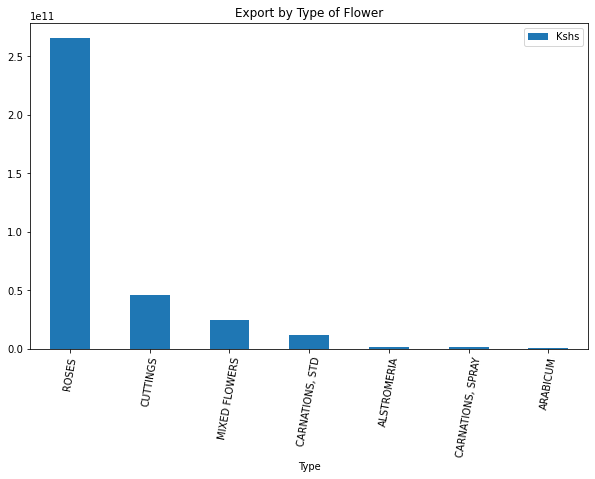

In [9]:
flowers.plot(y = "Kshs", kind='bar', figsize = (10, 6), rot=80)
plt.title('Export by Type of Flower')

Roses are the highest selling flowers at more than 250 B Kshs

In [10]:
veg = hort_df[hort_df["Commodity"] == "Vegetables"].groupby('Type').sum().sort_values("Kshs", ascending = False)
veg

,Kgs,Kshs
Type,,
BEANS FINE,1.782444e+08,4.421233e+10
BEANS X-FINE,5.058636e+07,9.579833e+09
PEAS SNOW,2.614664e+07,8.721774e+09
BEANS RUNNER,3.566530e+07,6.605674e+09
PEAS SNAP,1.886635e+07,5.393239e+09
OKRA,4.415142e+06,9.066091e+08
DUDHI,6.599723e+05,1.622434e+08


Text(0.5, 1.0, 'Export by Type of Vegetable')

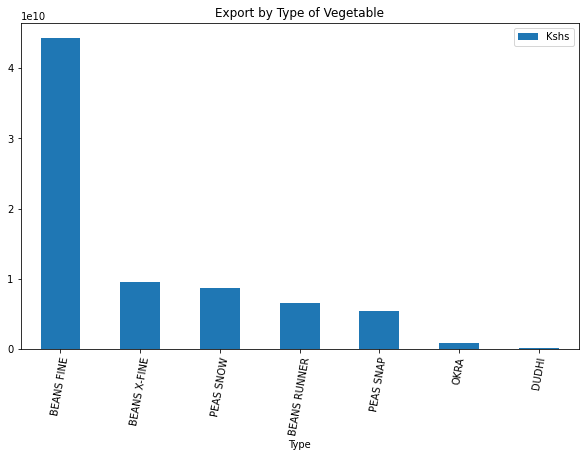

In [11]:
veg.plot(y = "Kshs", kind='bar', figsize = (10, 6), rot=80)
plt.title('Export by Type of Vegetable')

Beans fine are the highest selling vegetables at 40 Bn Kshs

In [12]:
fruits = hort_df[hort_df["Commodity"] == "Fruits"].groupby('Type').sum().sort_values("Kshs", ascending = False)
fruits

,Kgs,Kshs
Type,,
AVOCADO,1.839928e+08,1.465022e+10
MANGO,3.174773e+07,4.602497e+09
PASSION FRUIT,9.201683e+06,4.565904e+09


Text(0.5, 1.0, 'Export by Type of Fruit')

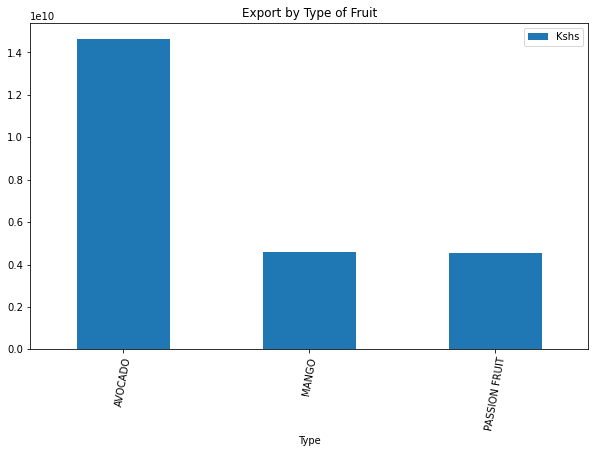

In [13]:
fruits.plot(y = "Kshs", kind='bar', figsize = (10, 6), rot=80)
plt.title('Export by Type of Fruit')

Avocados are the highest selling fruit in the market at 14bn Kshs